## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>


## Import Statements


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration


**Challenge**: Read the .csv file and store it in a Pandas dataframe


In [6]:
df = pd.read_csv('./QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe


In [8]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    504
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2561  2023-12-01 00:00:00     php   1259
2562  2023-12-01 00:00:00  python   7336
2563  2023-12-01 00:00:00       r   1633
2564  2023-12-01 00:00:00    ruby    158
2565  2023-12-01 00:00:00   swift    772


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?


In [9]:
df.shape

(2566, 3)

**Challenge**: Count the number of entries in each column of the dataframe


In [10]:
df.count()

DATE     2566
TAG      2566
POSTS    2566
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?


In [14]:
df.drop(['DATE'], axis=1).groupby('TAG').sum()

,POSTS
TAG,
assembly,43783
c,401756
c#,1608316
c++,802624
delphi,51571
go,71857
java,1910850
javascript,2518234
perl,67993


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [20]:
df.groupby(['TAG','DATE']).sum()

POSTS
TAG      DATE             
assembly 2008-08-01      8
         2008-09-01     28
         2008-10-01     16
         2008-11-01     16
         2008-12-01     17
...                    ...
swift    2023-08-01    971
         2023-09-01    863
         2023-10-01    905
         2023-11-01    873
         2023-12-01    772

[2566 rows x 1 columns]

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"


In [15]:
pd.to_datetime(df['DATE'])

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2561   2023-12-01
2562   2023-12-01
2563   2023-12-01
2564   2023-12-01
2565   2023-12-01
Name: DATE, Length: 2566, dtype: datetime64[ns]

In [17]:
type(pd.to_datetime(df['DATE']).iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


## Data Manipulation


In [21]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.


In [22]:
reshaped_df.shape

(186, 14)

In [25]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [26]:
reshaped_df.count()

TAG
assembly      185
c             185
c#            186
c++           185
delphi        185
go            170
java          185
javascript    185
perl          185
php           185
python        185
r             183
ruby          185
swift         177
dtype: int64

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?


In [27]:
reshaped_df.fillna(value=0, inplace=True)

In [28]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.


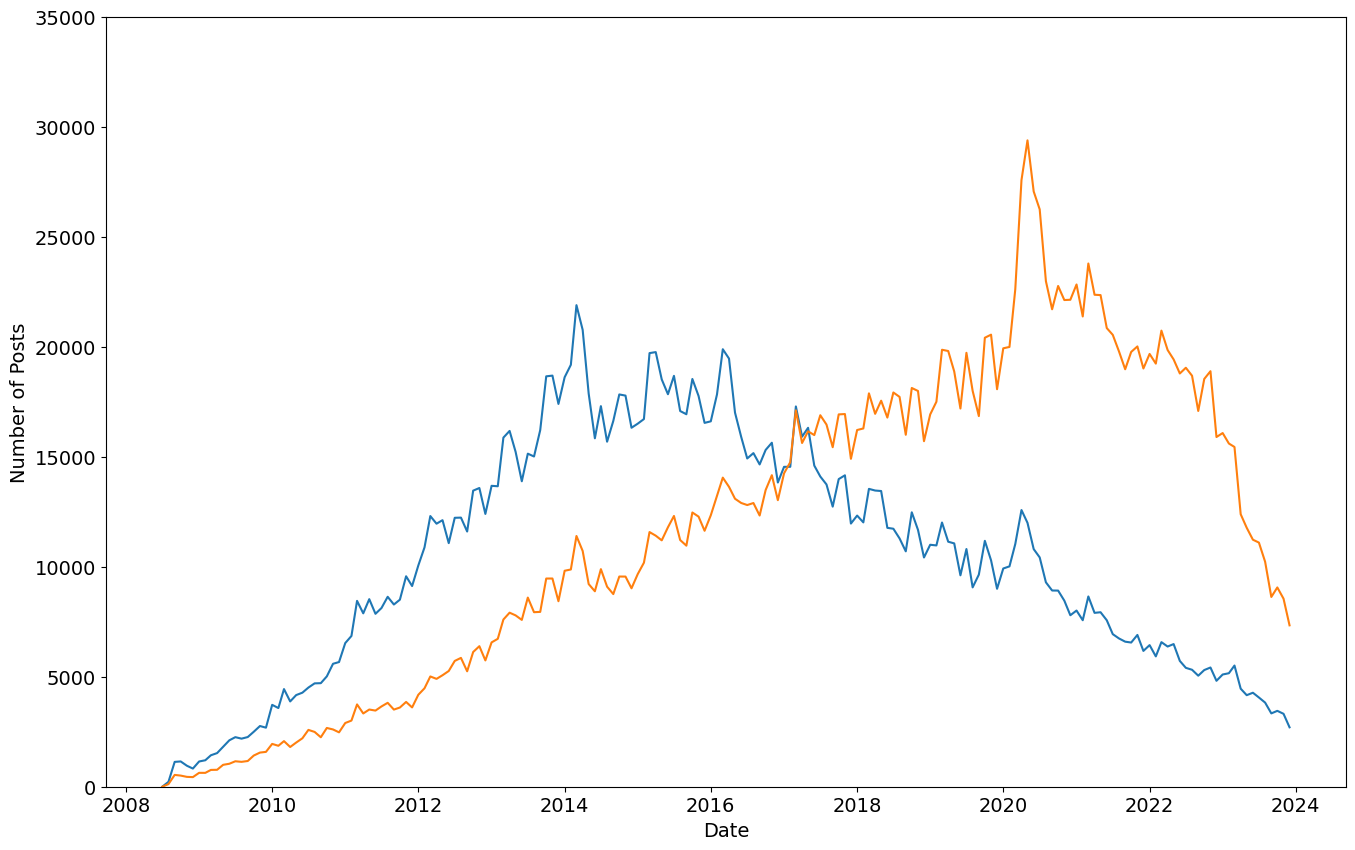

In [43]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df[['java','python']])

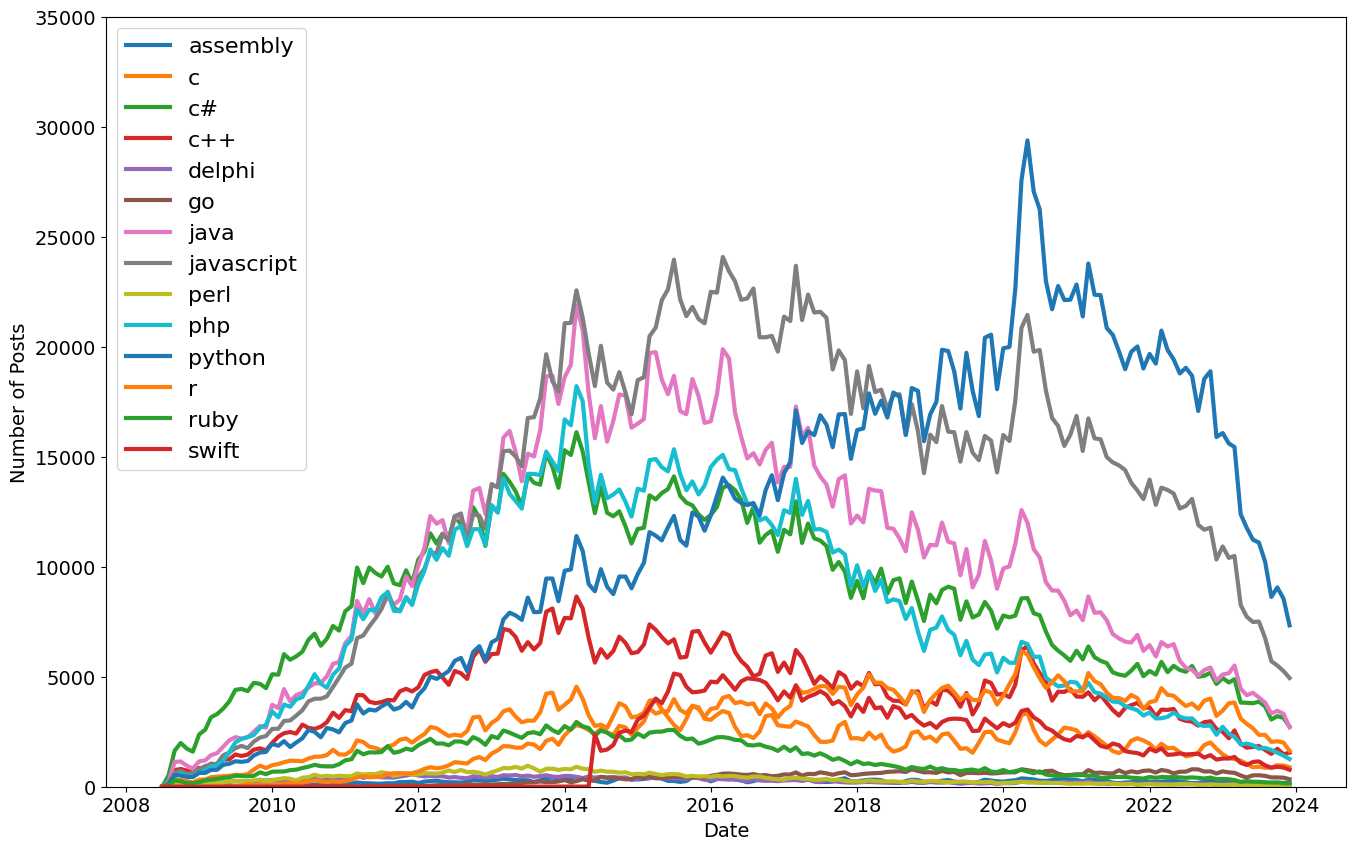

In [46]:
plt.figure(figsize=(16, 10))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df, linewidth=3, label=reshaped_df.columns)

plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).


In [53]:
roll_df = reshaped_df.rolling(window=6).mean()

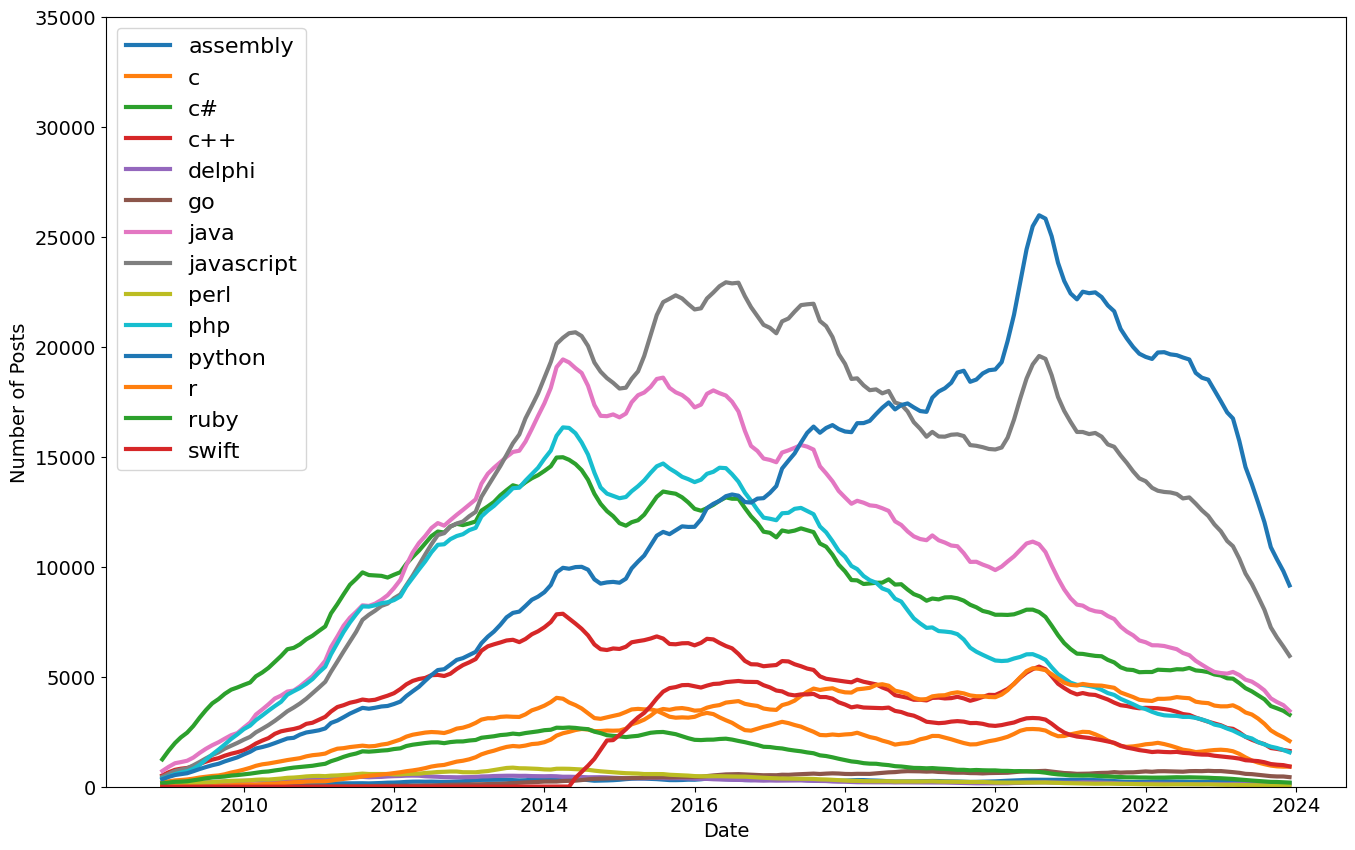

In [54]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(roll_df.index, roll_df, linewidth=3, label=roll_df.columns)

plt.legend(fontsize=16)